In [110]:
#import required libraries
import pandas as pd
import string
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

In [111]:
#set col width to 100
pd.set_option('display.max_colwidth', 100)

#stop word removal
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
from nltk.tokenize import word_tokenize

#Importing the excel file
excel_file= 'Management Stability-Data relevant.xlsx'
stability_rel = pd.read_excel(excel_file)
stability_rel = stability_rel[['Sentences']]
stability_rel['label'] = 1

excel_file1= 'Management Stability-Data Not relevant.xlsx'
stability_notrel = pd.read_excel(excel_file1)
stability_notrel = stability_notrel[['Sentences']]
stability_notrel['label'] = 0

stability_final = pd.concat([stability_rel,stability_notrel])

#get the size of dataset
print(stability_final.shape)
stability_final.head()

(2322, 2)


,Sentences,label
0,we reported last quarter that we have a penetration in terms of patients of about 59%. We have ...,1
1,0 if and when if it came out as we expect at the end of 2018. And the reality is our share is ...,1
2,"0%. And so we are still in the emerging economy, and we are still we have a really conservativ...",1
3,02 per share on earnings. Our objective in 2018 is to maintain our strong capital position while...,1
4,"04) to our team. From our last earnings release to now, our orders had been steady in Infrastruc...",1


In [112]:
#remove numeric values from dataset
stability_final['Sentences'] = stability_final['Sentences'].str.replace('\d+', '')

In [113]:
#add words that aren't in the NLTK stopwords list
new_stopwords = ['included','including','includes','one','two','three','general','generally','way','better','need','really','believe','provide','say','saying','says','include','said','also','would','could','end','recent','recently','us','like','make','may','look','still','come','see','across','even','much','get','allow','allows','allowed','allowing','well','go','gone','going','that','thats','take','thing','come','move','give','help','put','dont','people','got','kind','know','day','think','continue','look','year','years','new','use','there','want','wanted','due','become','organ']
new_stopwords_list = stopwords.extend(new_stopwords)

In [114]:
#data cleaning- removing punctuations, tokenize, stop words
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = set([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [115]:
#Split into train/test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(stability_final[['Sentences']], stability_final['label'], test_size=0.25)

In [116]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1741, 1) (1741,)
(581, 1) (581,)


In [117]:
        #Normalization technique using TF-IDF
        from sklearn.feature_extraction.text import TfidfVectorizer

        tfidf_vect = TfidfVectorizer(analyzer=clean_text, max_features=500, min_df = 3, max_df = 0.7)
        tfidf_vect_fit = tfidf_vect.fit(X_train['Sentences'])

        tfidf_train = tfidf_vect_fit.transform(X_train['Sentences'])
        tfidf_test = tfidf_vect_fit.transform(X_test['Sentences'])

        X_train_vect = pd.DataFrame(tfidf_train.toarray())
        X_test_vect = pd.DataFrame(tfidf_test.toarray())

        X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.267491,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.213443,0.0,0.0,0.0,0.0,0.229395,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


In [62]:
print(tfidf_vect.get_feature_names())

['abil', 'abl', 'acceler', 'accord', 'account', 'achiev', 'acquisit', 'activ', 'actual', 'ad', 'add', 'addit', 'adjust', 'administr', 'ago', 'ahead', 'almost', 'alreadi', 'although', 'alway', 'america', 'american', 'amount', 'analyst', 'announc', 'annual', 'anoth', 'anticip', 'approach', 'approxim', 'area', 'around', 'ask', 'asset', 'associ', 'assum', 'attract', 'averag', 'back', 'balanc', 'bank', 'base', 'basi', 'begin', 'benefit', 'best', 'big', 'billion', 'bit', 'board', 'book', 'brand', 'bring', 'build', 'busi', 'call', 'came', 'capabl', 'capac', 'capex', 'capit', 'care', 'case', 'cash', 'categori', 'certain', 'certainli', 'challeng', 'chang', 'china', 'clearli', 'client', 'close', 'combin', 'come', 'comment', 'commerci', 'commit', 'commun', 'compani', 'compar', 'competit', 'complet', 'concern', 'condit', 'confid', 'consid', 'consist', 'construct', 'consum', 'continu', 'contract', 'contribut', 'control', 'core', 'corpor', 'cost', 'countri', 'coupl', 'cours', 'creat', 'credit', 'cur

In [63]:
sum_words = tfidf_train.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

[('stabl', 78.13543434100131),
 ('steadi', 56.8931814078102),
 ('market', 49.779259662115976),
 ('growth', 48.49164352454302),
 ('busi', 48.00830366591017),
 ('quarter', 44.963699709851255),
 ('expect', 40.59165264307416),
 ('increas', 35.35609968399004),
 ('product', 35.1865562613703),
 ('remain', 35.180691736784425),
 ('price', 34.49123201274821),
 ('rate', 33.495236752095934),
 ('time', 33.41625089383878),
 ('compani', 33.25521635808064),
 ('last', 32.8595840292992),
 ('margin', 32.488652225784826),
 ('oper', 31.26265146777068),
 ('million', 29.60051348236012),
 ('invest', 28.722063264608206),
 ('revenu', 28.683124028269916),
 ('weve', 28.420147518154504),
 ('strong', 28.28063745003943),
 ('continu', 28.206536791164773),
 ('result', 27.983122993798244),
 ('improv', 27.678502794077115),
 ('cost', 27.007181458313816),
 ('share', 26.780748273561652),
 ('perform', 25.562477752479975),
 ('custom', 24.99568695585367),
 ('cash', 24.752140500270755),
 ('level', 24.669289861158394),
 ('grow'

In [102]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [103]:
#Function to plot intuitive confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [104]:
#randfom forest using grid search
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
grid_values = {'n_estimators' : [200, 500, 700, 1000], 'max_depth' : [10, 20, 30, None], 'n_jobs' : [-1]}
grid_rfc_acc = GridSearchCV(rfc, param_grid = grid_values)
grid_rfc_acc.fit(X_train_vect, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500, 700, 1000], 'max_depth': [10, 20, 30, None], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
#obtain best parameters
grid_rfc_acc.best_params_

{'max_depth': None, 'n_estimators': 500, 'n_jobs': -1}

In [106]:
rf = RandomForestClassifier(n_estimators=500, max_depth=None, n_jobs=-1)

start = time.time()
rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf.predict(X_test_vect)
end = time.time()
pred_time = (end - start)

print('Accuracy for test set: ' + str(accuracy_score(y_test,y_pred)))
print('Precision  for test set: ' + str(precision_score(y_test,y_pred)))
print('Recall  for test set: ' + str(recall_score(y_test,y_pred)))
print('F1 Score  for test set: ' + str(f1_score(y_test,y_pred)))
print('Fit time  for test set: ' + str(fit_time))
print('Predict time  for test set: ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy for test set: 0.9655765920826161
Precision  for test set: 0.9455040871934605
Recall  for test set: 1.0
F1 Score  for test set: 0.9719887955182072
Fit time  for test set: 1.5788710117340088
Predict time  for test set: 0.2057650089263916
Confusion Matrix : 
[[214  20]
 [  0 347]]


In [107]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train_vect.columns.tolist())

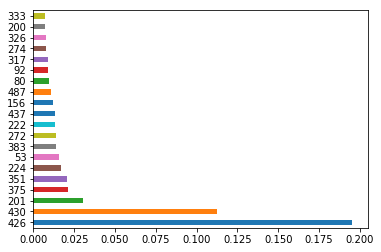

In [108]:
#Top 20 features
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
feat_importances[415:420]

Confusion matrix, without normalization
[[214  20]
 [  0 347]]


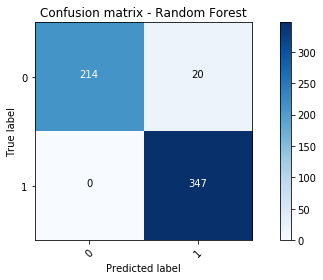

In [109]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Random Forest')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


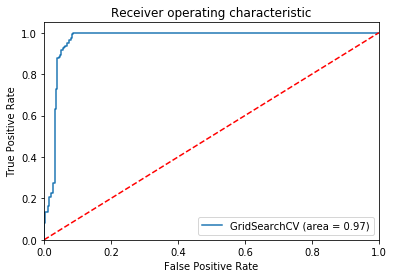

In [19]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_rfc_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [20]:
#gbm using grid search
from sklearn.model_selection import GridSearchCV
gbm = GradientBoostingClassifier()
grid_values = {'n_estimators' : [150, 200, 500], 'max_depth' : [7, 11, 15]}
grid_gbm_acc = GridSearchCV(gbm, param_grid = grid_values)
grid_gbm_acc.fit(X_train_vect, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150, 200, 500], 'max_depth': [7, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
grid_gbm_acc.best_params_

{'max_depth': 7, 'n_estimators': 150}

In [22]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=7)
start = time.time()
gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.955249569707401
Precision : 0.9418604651162791
Recall : 0.9818181818181818
F1 Score : 0.9614243323442137
Fit time : 0.011003732681274414
Predict time : 0.10634493827819824
Confusion Matrix : 
[[231  20]
 [  6 324]]


In [28]:
feat_importances = pd.Series(gb.feature_importances_, index=X_train_vect.columns.tolist())

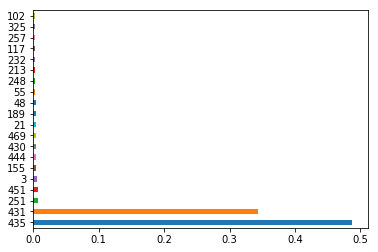

In [29]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[231  20]
 [  6 324]]


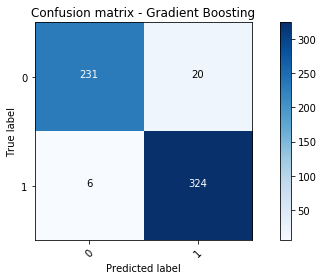

In [23]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Gradient Boosting')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


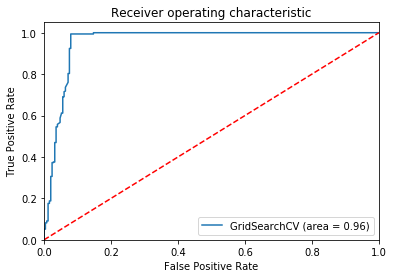

In [24]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_gbm_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
#xgbm using grid search
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgbm = XGBClassifier()
grid_values = {'n_estimators' : [150, 200, 500], 'max_depth' : [5, 7, 10]}
grid_xgbm_acc = GridSearchCV(xgbm, param_grid = grid_values)
grid_xgbm_acc.fit(X_train_vect, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150, 200, 500], 'max_depth': [5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
grid_xgbm_acc.best_params_

{'max_depth': 5, 'n_estimators': 150}

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=150, max_depth=5)
start = time.time()
xgb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = xgb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.9604130808950087
Precision : 0.9423631123919308
Recall : 0.990909090909091
F1 Score : 0.96602658788774
Fit time : 0.017938852310180664
Predict time : 0.10634493827819824
Confusion Matrix : 
[[231  20]
 [  3 327]]


In [33]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train_vect.columns.tolist())

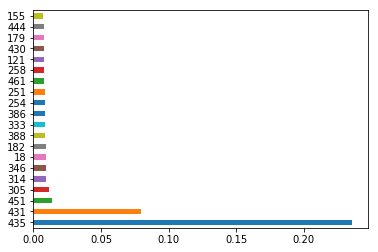

In [34]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[231  20]
 [  3 327]]


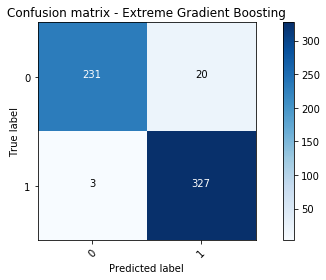

In [35]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Extreme Gradient Boosting')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


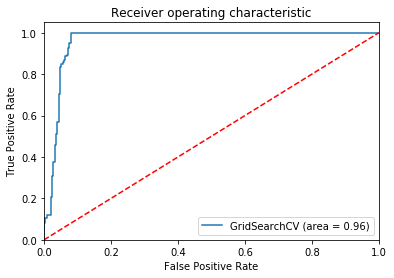

In [36]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_xgbm_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [90]:
#logistic regression grid search
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train_vect, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
grid_clf_acc.best_params_

{'C': 0.09, 'penalty': 'l1'}

In [92]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 0.09, penalty = 'l1')
start = time.time()
log.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = log.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.955249569707401
Precision : 0.9323076923076923
Recall : 0.9869706840390879
F1 Score : 0.9588607594936709
Fit time : 0.0012729167938232422
Predict time : 0.20774507522583008
Confusion Matrix : 
[[252  22]
 [  4 303]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [93]:
import numpy as np
logmodel = log.fit(X_train_vect, y_train)
coefs=logmodel.coef_[0]
top_three = np.argpartition(coefs, -20)[-20:]
#top_three_sorted=top_three[np.argsort(coefs[top_three])]
top_three

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([182, 180, 173, 184, 158, 170, 169, 168, 167, 166, 427, 165, 164,
       430, 163, 162, 161, 160, 159, 499])

In [ ]:
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Confusion matrix, without normalization
[[231  20]
 [  2 328]]


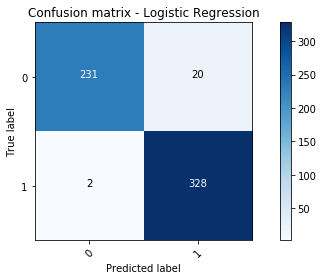

In [46]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Logistic Regression')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be change

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

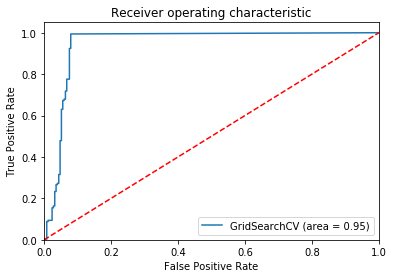

In [42]:
#Plotting ROC curve
from sklearn import metrics
probs = grid_clf_acc.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [118]:
#Using Naive Bayes 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#nb = MultinomialNB()

nb = GaussianNB()
start = time.time()
nb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = nb.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.8123924268502581
Precision : 0.7853658536585366
Recall : 0.9387755102040817
F1 Score : 0.855245683930943
Fit time : 0.004968166351318359
Predict time : 0.2057650089263916
Confusion Matrix : 
[[150  88]
 [ 21 322]]


In [119]:
pos_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()

print(np.take(tfidf_vect.get_feature_names(), pos_class_prob_sorted[-20:]))

['million' 'rate' 'weve' 'continu' 'strong' 'oper' 'revenu' 'improv'
 'last' 'product' 'margin' 'increas' 'remain' 'market' 'expect' 'busi'
 'quarter' 'growth' 'steadi' 'stabl']


Confusion matrix, without normalization
[[231  20]
 [  2 328]]


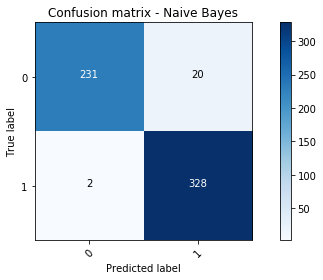

In [47]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - Naive Bayes')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

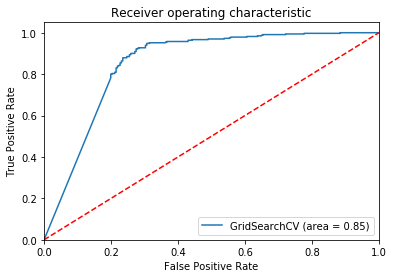

In [48]:
#Plotting ROC curve
from sklearn import metrics
probs = nb.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [49]:
#KNN using grid search
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)

grid.fit(X_train_vect, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
grid.best_params_

{'n_neighbors': 29}

In [51]:
#Using K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 29)
start = time.time()
knn.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = knn.predict(X_test_vect)
end = time.time()
fit_time = (end - start)

print('Accuracy : ' + str(accuracy_score(y_test,y_pred)))
print('Precision : ' + str(precision_score(y_test,y_pred)))
print('Recall : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('Fit time : ' + str(fit_time))
print('Predict time : ' + str(pred_time))

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy : 0.8209982788296041
Precision : 0.900709219858156
Recall : 0.7696969696969697
F1 Score : 0.8300653594771241
Fit time : 0.8916821479797363
Predict time : 0.10634493827819824
Confusion Matrix : 
[[223  28]
 [ 76 254]]


Confusion matrix, without normalization
[[223  28]
 [ 76 254]]


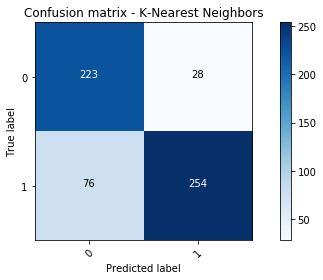

In [52]:
#confusion matrix plot
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = [0,1]
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix - K-Nearest Neighbors')
a = plt.gcf()
a.set_size_inches(8,4)
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


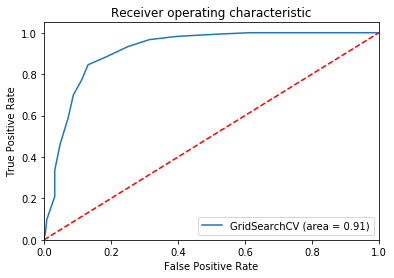

In [53]:
#Plotting ROC curve
from sklearn import metrics
probs = grid.fit(X_train_vect, y_train).predict_proba(X_test_vect)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()